In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import *

import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
plt.rcdefaults()

In [4]:
DATA_FOLDER = "../Data/"

movies_imdb = pd.read_csv(DATA_FOLDER + 'movies_imdb.csv',
                          converters={'languages': parse_list, 'countries': parse_list, 'genresCmu': parse_list,
                                      'genresImdb': parse_list})

Number of movies with runtime > 400: 66
Number of movies with negative runtime: 0
Number of movies with runtime between [0, 20]: 3102
Number of na values: 20396


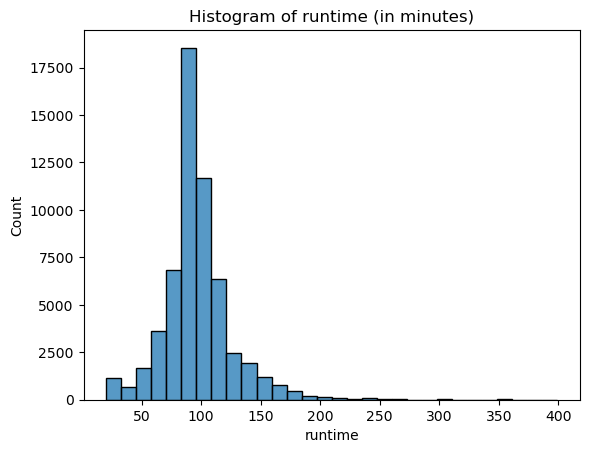

In [5]:
num_movies_gt_400 = len(movies_imdb[movies_imdb['runtime'] > 400])
num_movies_neg_runtime = len(movies_imdb[movies_imdb['runtime'] < 0])
num_movies_0_20_runtime = len(movies_imdb[(movies_imdb['runtime'] >= 0) & (movies_imdb['runtime'] <= 20)])

print(f"Number of movies with runtime > 400: {num_movies_gt_400}")
print(f"Number of movies with negative runtime: {num_movies_neg_runtime}")
print(f"Number of movies with runtime between [0, 20]: {num_movies_0_20_runtime}")

print(f"Number of na values: {movies_imdb['runtime'].isna().sum()}")

# Drop movies with runtime > 400, negative runtime and runtime between [0, 20] 
# (should we drop them or just set them to nan?)
movies_imdb = movies_imdb.drop(movies_imdb[movies_imdb['runtime'] > 400].index)
movies_imdb = movies_imdb.drop(movies_imdb[movies_imdb['runtime'] < 0].index)
movies_imdb = movies_imdb.drop(movies_imdb[(movies_imdb['runtime'] >= 0) & (movies_imdb['runtime'] <= 20)].index)

# Histogram of runtime
sns.histplot(data=movies_imdb, x="runtime", bins=30)
plt.title("Histogram of runtime (in minutes)")
plt.show()

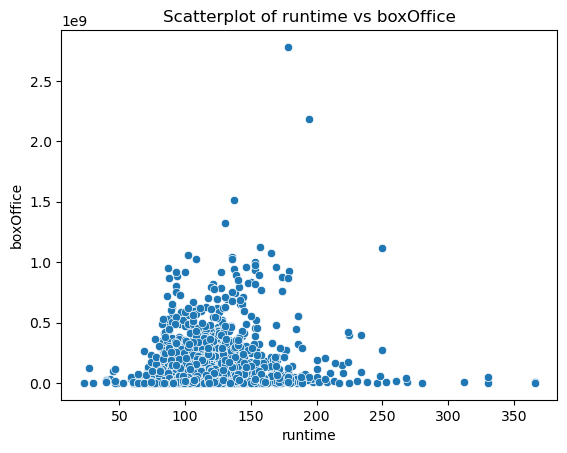

In [6]:
# Scatterplot of runtime vs boxOffice
sns.scatterplot(data=movies_imdb, x="runtime", y="boxOffice")
plt.title("Scatterplot of runtime vs boxOffice")
plt.show()

Number of movies with box office set to NaN: 70072
Proportion of movies with box office set to NaN: 0.8930692564553542


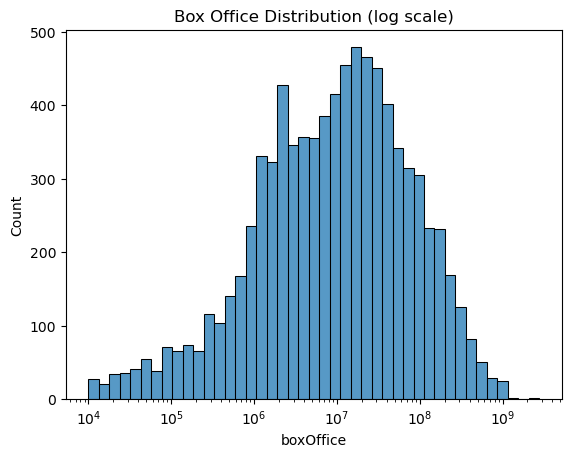

In [7]:
print(f"Number of movies with box office set to NaN: {movies_imdb['boxOffice'].isna().sum()}")
print(f"Proportion of movies with box office set to NaN: {movies_imdb['boxOffice'].isna().sum() / len(movies_imdb)}")

sns.histplot(data=movies_imdb, x="boxOffice", log_scale=True)
plt.title("Box Office Distribution (log scale)")
plt.show()

In [8]:
print(f"Number of movies with genresImdb information: {movies_imdb['genresImdb'].notnull().sum()}")
print(
    f"Proportion of movies with genresImdb information: {movies_imdb['genresImdb'].notnull().sum() / len(movies_imdb)}")

print(f"Number of movies with genresCmu information: {movies_imdb['genresCmu'].notnull().sum()}")
print(f"Proportion of movies with genresCmu information: {movies_imdb['genresCmu'].notnull().sum() / len(movies_imdb)}")

# Je pense pas que ca soit normal

Number of movies with genresImdb information: 28662
Proportion of movies with genresImdb information: 0.3652978511891107
Number of movies with genresCmu information: 76179
Proportion of movies with genresCmu information: 0.9709031123346333


In [9]:
movies_imdb_exploded = movies_imdb.explode('genresImdb')
imdb_genre_boxoffice = movies_imdb_exploded.dropna(subset=['genresImdb']).groupby('genresImdb')['boxOffice'].agg(
    ['mean', 'median'])
imdb_genre_boxoffice.columns = ['mean_boxoffice', 'median_boxoffice']

genre_counts = movies_imdb_exploded['genresImdb'].value_counts()
imdb_genre_boxoffice = imdb_genre_boxoffice.merge(genre_counts, left_index=True, right_index=True)
imdb_genre_boxoffice.columns = ['mean_boxoffice', 'median_boxoffice', 'num_movies']
imdb_genre_boxoffice

,mean_boxoffice,median_boxoffice,num_movies
genresImdb,,,
Action,8.565336e+07,27007143.0,3190
Adult,5.000000e+07,50000000.0,65
Adventure,1.090502e+08,28445927.0,2428
Animation,1.480309e+08,55293297.5,613
Biography,2.883393e+07,6659377.0,960
Comedy,4.396099e+07,12000000.0,8613
Crime,3.659286e+07,11567217.0,3651
Documentary,1.604474e+07,1332110.0,1712
Drama,3.156991e+07,6600310.5,15161


In [10]:
movies_imdb_exploded = movies_imdb.explode('genresCmu')
cmu_genre_boxoffice = movies_imdb_exploded.dropna(subset=['genresCmu']).groupby('genresCmu')['boxOffice'].agg(
    ['mean', 'median'])
cmu_genre_boxoffice.columns = ['mean_boxoffice', 'median_boxoffice']

genre_counts = movies_imdb_exploded['genresCmu'].value_counts()
cmu_genre_boxoffice = cmu_genre_boxoffice.merge(genre_counts, left_index=True, right_index=True)
cmu_genre_boxoffice.columns = ['mean_boxoffice', 'median_boxoffice', 'num_movies']
cmu_genre_boxoffice

,mean_boxoffice,median_boxoffice,num_movies
genresCmu,,,
Absurdism,7.571945e+07,29106786.0,91
Acid western,6.412655e+05,641265.5,9
Action,8.875071e+07,23510601.0,8738
Action Comedy,8.380756e+07,38576276.5,168
Action Thrillers,1.093814e+08,44350926.0,516
...,...,...,...
World History,2.796540e+05,311542.0,19
World cinema,1.867080e+07,6204504.0,7141
Wuxia,8.764117e+07,96431972.5,125
